Importing Keras libraries

In [ ]:
import keras

Importing ImageDataGenerator from Keras

In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Defining the Parameters

In [ ]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

Applying ImageDataGenerator functionality to train dataset


In [ ]:
x_train = train.flow_from_directory("/content/drive/MyDrive/forest fire/Dataset/Dataset/train_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 441 images belonging to 2 classes.


Applying ImageDataGenerator functionality to test dataset

In [ ]:
x_test = test.flow_from_directory("/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [ ]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

Importing Model Building Libraries


In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Initializing the model

In [ ]:
model =Sequential()

Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

Add Dense layers

In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

configuring the learning process

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

Training the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=5,validation_data=x_test,validation_steps=20)

Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 0.9393 - accuracy: 0.7052

14/14 [==============================] - 159s 11s/step - loss: 0.9393 - accuracy: 0.7052 - val_loss: 0.2211 - val_accuracy: 0.9008
Epoch 2/5
14/14 [==============================] - 16s 1s/step - loss: 0.3004 - accuracy: 0.8707
Epoch 3/5
14/14 [==============================] - 15s 1s/step - loss: 0.1978 - accuracy: 0.9116
Epoch 4/5
14/14 [==============================] - 14s 1s/step - loss: 0.1572 - accuracy: 0.9320
Epoch 5/5
14/14 [==============================] - 17s 1s/step - loss: 0.1253 - accuracy: 0.9478



Save The Model

In [ ]:
model.save("forest1.h5")

Predictions

In [16]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

4/4 [==============================] - 5s 1s/step


In [17]:
predictions

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [18]:
print(len(predictions))

121


In [19]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2

In [20]:
#load the saved model
model = load_model("forest1.h5")

In [21]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(64,64))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [22]:
predictImage("/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/with fire/FORESTFIRE (1).jpg")

1/1 [==============================] - 0s 77ms/step
[[1.]]
 fire


Open cv2 for video processing

In [23]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [24]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=79bfa237581795208c5932740ce3d9e3b8a94249f7d8c3b23a93ef121260df6d
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [25]:
#import opencv librariy
#import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [26]:
#load the saved model
model = load_model(r'forest1.h5')
#define the features
name = ['forest','with forest']

Creating An Account in Twilio Service

In [28]:
account_sid='ACcd50918435afdf4a48f0b5b00c086b25'
auth_token='67f9c3634ecc7369e817f0beb3618276'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
    body='forest fire is detected,stay alert',
#use twilio free number
    from_='+14635832381',
#to number
    to='+919025868474')
print(message.sid)

SM08744ac6fe5a9cee6c9793e25688c05e


Sending Alert Message

In [29]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='ACcd50918435afdf4a48f0b5b00c086b25'
    auth_token='67f9c3634ecc7369e817f0beb3618276'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+14635832381',
        #to number
        to='+919025868474')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 111ms/step


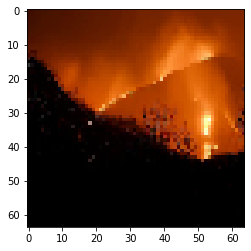

Forest fire
SM42d6580b6336243f543e73dad2f54b8c
Fire detected
SMS Sent!


In [34]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/with fire/Fire_2_696x392.jpg',target_size=(64,64))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

1/1 [==============================] - 0s 42ms/step


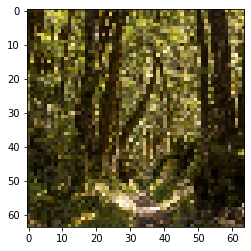

No Fire


In [35]:
img2 = image.load_img('/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/forest/5472.jpg',target_size=(64,64))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)